In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_excel('data/companies.xlsx')

#Drop the companies without available data for machine learning
df = df.dropna()

df


,company,cvr,2022,2021,2020,employees,address
0,NorthTech ApS,10121361,5.0,598.0,792.0,20,"Wildersgade 51, København K"
1,PFA,13594376,-79000.0,108000.0,10000.0,1464,"Sundkrogsgade 4, København Ø"
2,Netcompany A/S,14814833,583573.0,570944.0,450133.0,2340,"Grønningen 17, København K"
3,Elbek-vejrup,20117982,43935.0,54376.0,44403.0,171,"Tangen 6, Aarhus N"
4,ELLAB A/S,20896949,136500.0,98092.0,90317.0,166,"Trollesmindealle 25, Hillerød"
5,Wilke A/S,21830445,3834.0,2006.0,1561.0,175,"Gråbrødrepassagen 9, Odense C"
6,Novo Nordisk,24256790,47523000.0,42159000.0,39252000.0,22150,"Novo Alle 1, Bagsværd"
7,KMD A/S,26911745,53926.0,2893.0,173758.0,1855,"Lautrupparken 40, Ballerup"
8,Alpha Solutions,27506488,3477.0,4334.0,-2940.0,59,"Gothersgade 14, København K"
9,Formpipe,29177015,36583.0,14719.0,7525.0,87,"Lautrupvang 1, Ballerup"


In [2]:
#Method to predict the latest yearly result based on the previous and the before for a single company

def predict_2022_result(company_name) :
    row = df[df['company'] == company_name].iloc[0]
    
    #Define the X and Y values for linear regression
    X = [[2020], [2021]]
    y = [row[2020], row[2021]]

    # Create a Linear Regression model and fit it to your data
    model = LinearRegression()
    model.fit(X, y)
    
    # Use the model to make a prediction for 2021
    prediction = model.predict([[2022]])
    
    # Plot the data and the line of best fit
    plt.scatter(X, y)
    plt.plot(X, model.predict(X), color='red')
    plt.plot([[2022]], prediction, 'ro')
    plt.xlabel('Year')
    plt.ylabel('Income')
    plt.title('Linear Regression')
    plt.show()

    # Return the prediction
    return f'Expected income of 2022: {int(prediction)}000 DKK \nActual income of 2022: {int(row[2022])}000'

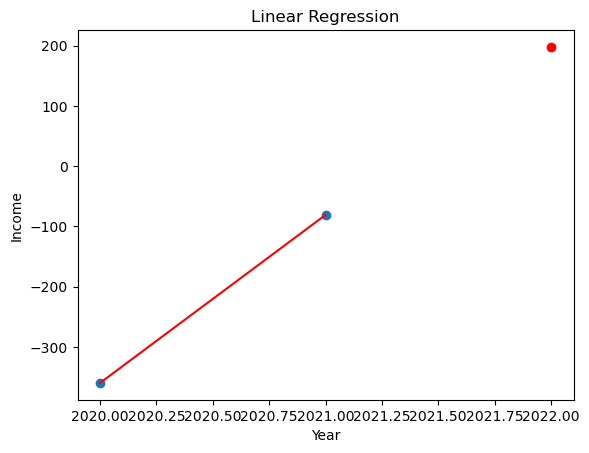

Expected income of 2022: 198000 DKK 
Actual income of 2022: 451000


In [3]:
#Call the method
print(predict_2022_result('Meew'))

### Categorize the companies as Small, Middle or Large
We will base the size of a company on the amount of employees according the the European standards. 

**Employees:**
1. Companies with fewer than 50 employees are regarded as small
2. Companies with fewer than 250 employees are regarded as medium
3. Companes above 250 employees are regarded as large

**Yearly income:**
1. Companies with an annual turnover of less than 75 million DKK is regarded as small
2. Companies with an annual turnover of less than 375 million DKK is regarded as medium
3. Companies with an annual turnover of more than 375 million DKK is regarded as large

In [4]:
#Get lists of small companies and their address so we can pass it through a geolocation library.
small_company_names = []
small_company_addresses = []

for index, row in df.iterrows():
    if row['employees'] < 50 and row[2022] < 75000:
        small_company_names.append(row['company'])
        small_company_addresses.append(row['address'])
    
print(small_company_names)
print(small_company_addresses)

['NorthTech ApS', 'Carve Consulting P/S', 'Precure', 'Meew', 'Ooono', 'Dynatest A/S', 'Lejka']
['Wildersgade 51, København K', 'Købmagergade 11, København K', 'Bryggeristræde 2, Allinge', 'Wildersgade 9, København K', 'Gearhalsvej 1, Valby', 'Tempovej 27, Ballerup', 'Jagtvej 157, København N']


In [8]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

latitudes = []
longitudes = []
for address in small_company_addresses:
    location = geolocator.geocode(address)
    latitudes.append((location.latitude))
    longitudes.append((location.longitude))

#Insert the latitude and longitude into a new dataframe with each company
data = {'Company': small_company_names, 'Latitude': latitudes, 'Longitude': longitudes}
location_df = pd.DataFrame(data)

location_df

,Company,Latitude,Longitude
0,NorthTech ApS,55.674321,12.591612
1,Carve Consulting P/S,55.679721,12.579087
2,Precure,55.274825,14.800772
3,Meew,55.672322,12.588527
4,Ooono,55.660184,12.514151
5,Dynatest A/S,55.723369,12.376387
6,Lejka,55.702334,12.557268


In [9]:
# Location of all 'small' companies
import folium

# Create a base map centered on Denmark
denmark_map = folium.Map(location=[55.67, 12.57], zoom_start=7)

#Add markers to where students have been in internship
for index, row in location_df.iterrows():
    folium.Marker([row["Latitude"], row["Longitude"]], popup=row["Company"]).add_to(denmark_map)

# Show the map
denmark_map

In [16]:
print(latitudes)
print(longitudes)

[55.674321, 55.679721, 55.274825, 55.672322, 55.660184, 55.723369, 55.702334]
[12.591612, 12.579087, 14.800772, 12.588527, 12.514151, 12.376387, 12.557268]


In [18]:
# Apply machine learning to predict the location of a new small company in 2023
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the data for machine learning
X = np.array(latitudes).reshape((-1, 1))
y = np.array(longitudes)

# Split the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_prediction)

print(f"Model accuracy: {accuracy}")

ValueError: Unknown label type: 'continuous'